# Dictionnaire des variables






 puiss_admin_98: la puissance administrative  
 
 puiss_max: la puissance maximale (en kW) 
 
 conso_urb: consommation urbaine de carburant  (en l/100km)
 
 conso_mixte: consommation extra urbaine de carburant  (en l/100km)
 
 co2: l'émission de CO2 (en g/km)   gramme par km
 
 masse_ordma_min: la masse en ordre de marche mini en kg
 
 masse_ordma_max: la masse en ordre de marche maxi en kg
 
 lib_mrq: La marque
 
 cod_cbr: type de carburant
 
 gamme: gamme
 
 
 

# Importation des données brutes et des bibliothèques

In [47]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import validation_curve
import warnings




In [48]:
data = pd.read_csv("C:/Users/lenovo/Desktop/FormationDigi/Jour 1/notebook/co2.csv", sep=";")
data.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


<span style="color:blue">Supprimer les colonnes: conso_urb, conso_exurb et conso_mixte`</span>
                                                                                            

In [11]:
data.drop(columns=['conso_urb', 'conso_exurb', 'conso_mixte'], inplace=True, errors='ignore')
data

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54690,VOLVO,XC70,XC70,XC70 D4 4cyl (181ch) Stop&Start Geartronic 8,M10VLVVP900U606,BZ73CD,GO,non,10,133,...,1755,1755,715/2007*195/2013EURO6,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
54691,VOLVO,XC70,XC70,XC70 D4 5cyl (181ch) AWD Geartronic 6,M10VLVVP900V607,BZ8156,GO,non,11,133,...,1799,1799,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
54692,VOLVO,XC70,XC70,XC70 D5 (215ch) AWD Geartronic 6,M10VLVVP872R581,BZ8256,GO,non,13,158,...,1798,1798,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
54693,VOLVO,XC70,XC70,XC70 D5 (215ch) Stop&Start AWD BVM6,M10VLVVP8723582,BZ83A4,GO,non,12,158,...,1788,1788,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN


<span style="color:gree"> Extraction de la base de données des variables continues ou quantitatives. Ce sont ces variables qui seront utilisées pour la construction de notre modèle </span>



In [12]:
df = data.select_dtypes(include=['int', 'float'])
df=df.astype(float)
df.head()

,puiss_admin_98,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,12.0,182.0,1505.0,1505.0,NaN,NaN,NaN,NaN
1,12.0,186.0,1555.0,1555.0,NaN,NaN,NaN,NaN
2,7.0,134.0,1565.0,1565.0,NaN,NaN,NaN,NaN
3,7.0,134.0,1565.0,1565.0,NaN,NaN,NaN,NaN
4,9.0,139.0,1565.0,1565.0,NaN,NaN,NaN,NaN


# Analyse exploratoire des données

In [13]:
# Vérifions les colonnes qui comportes des données manquantes dans notre dataset
df.isnull().any()


puiss_admin_98     False
co2                 True
masse_ordma_min    False
masse_ordma_max    False
Unnamed: 26         True
Unnamed: 27         True
Unnamed: 28         True
Unnamed: 29         True
dtype: bool

<span style="color:blue"> Pourcentage de valeurs manquantes pour chaque variable de notre dataFrame  </span>



In [14]:

missing_values = df.isnull().sum()
prctg_manquant = (missing_values / len(df)) * 100
print(percentage_missing)


puiss_admin_98       0.000000
co2                  0.062163
masse_ordma_min      0.000000
masse_ordma_max      0.000000
Unnamed: 26        100.000000
Unnamed: 27        100.000000
Unnamed: 28        100.000000
Unnamed: 29        100.000000
dtype: float64


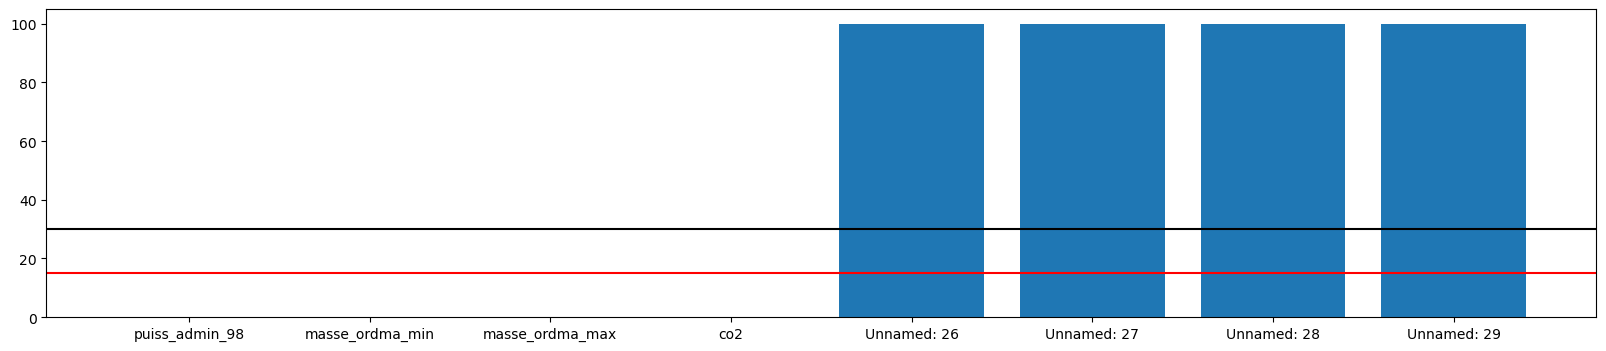

In [15]:
# Visualisation des données manquantes

fig=plt.figure(figsize=(20,4))
plt.bar(x=prctg_manquant.sort_values().index, height=prctg_manquant.sort_values().values)
plt.axhline(y = 15, color = 'r', linestyle ='-')
plt.axhline(y = 30, color = 'k', linestyle ='-')

<span style="color:blue"> Statistiques descriptives des variables </span>



In [16]:

df.describe()

,puiss_admin_98,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,54695.000000,54661.000000,54695.000000,54695.000000,0.0,0.0,0.0,0.0
mean,10.536393,202.027826,2105.109023,2345.550763,NaN,NaN,NaN,NaN
std,5.098993,33.674446,292.694584,421.211048,NaN,NaN,NaN,NaN
min,1.000000,13.000000,825.000000,825.000000,NaN,NaN,NaN,NaN
25%,9.000000,193.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,205.000000,2076.000000,2355.000000,NaN,NaN,NaN,NaN
75%,10.000000,216.000000,2246.000000,2709.000000,NaN,NaN,NaN,NaN
max,81.000000,572.000000,2760.000000,3094.000000,NaN,NaN,NaN,NaN


<span style="color:blue"> Représentation des boxplots des distributions des variables avec les outliers  </span>



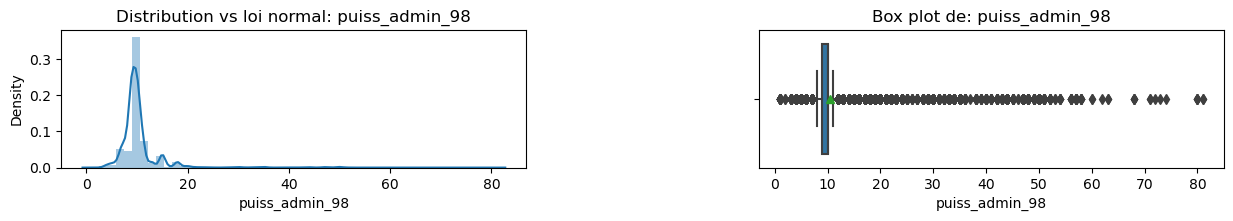

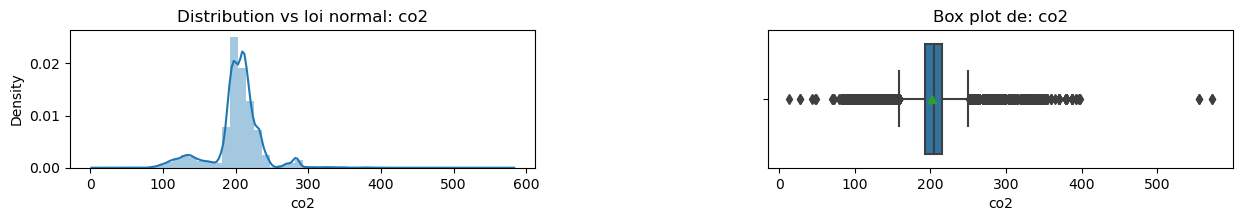

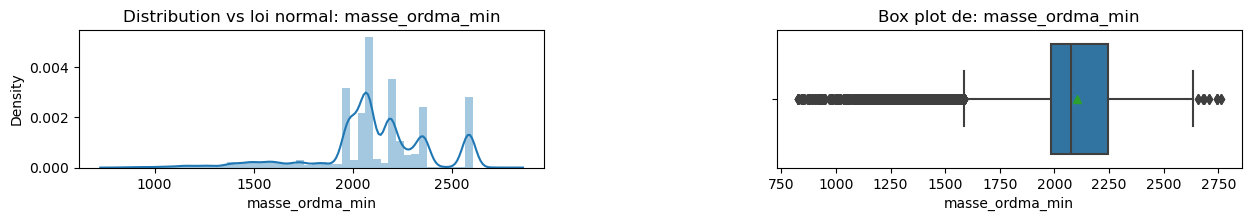

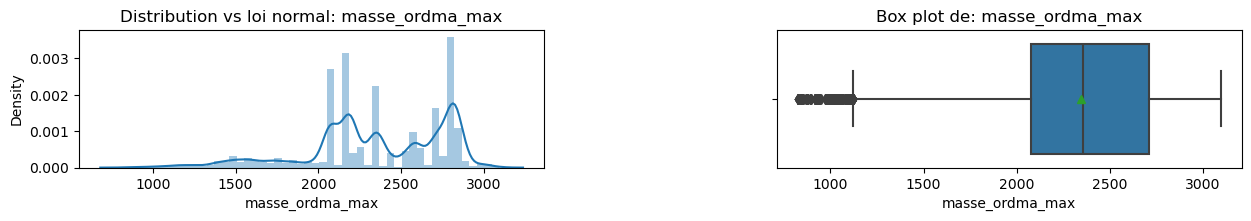

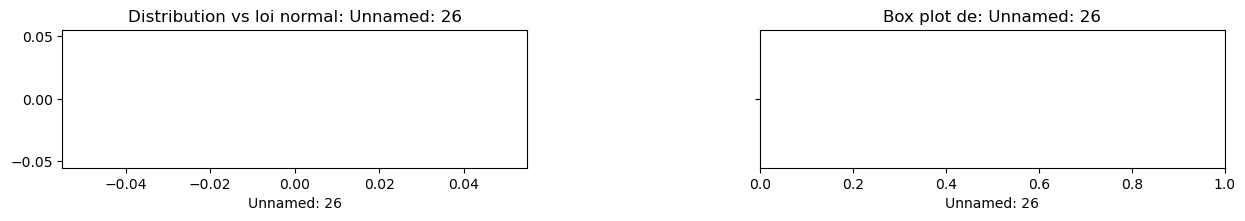

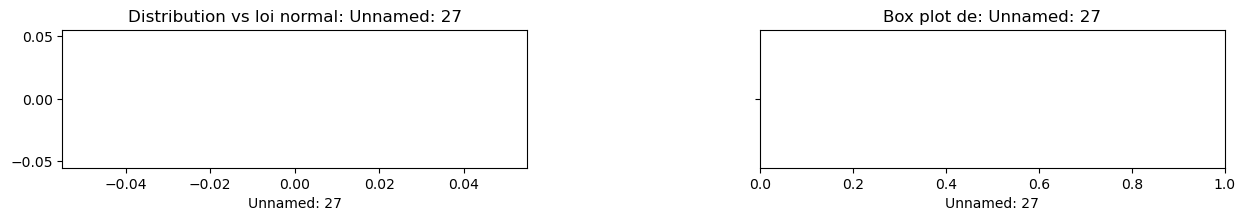

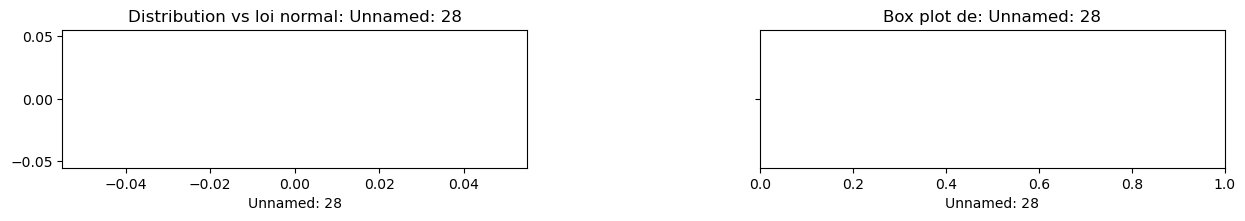

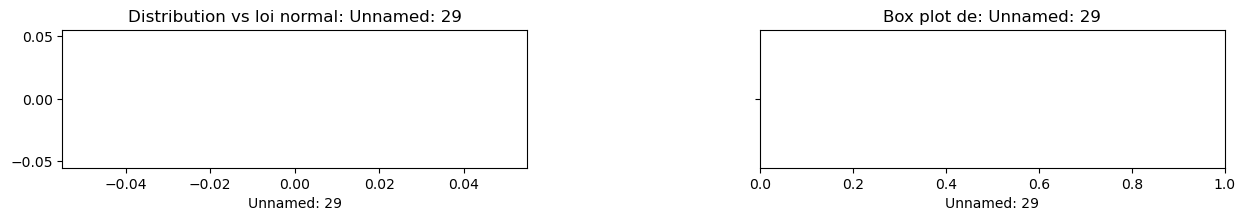

In [18]:
plt.rcParams["figure.figsize"] = [15,5]
grid = plt.GridSpec(2,2 , wspace=0.5, hspace=0.8)
for col in df.select_dtypes( include = ['float', 'int']).columns.to_list():
    plt.figure()
    ax0 = plt.subplot(grid[0, 0:1])
    ax0= sns.distplot(df[col], kde =True)
    ax0.set_title("Distribution vs loi normal: {}" .format(col), fontsize = 12)
    ax1 = plt.subplot(grid[0, 1:])
    ax1= sns.boxplot(data = df,  x = df[col], showfliers =True, showmeans =True)
    ax1.set_title("Box plot de: {}" .format(col), fontsize = 12)
warnings.filterwarnings("ignore")

**COMMENTAIRE**: Nous constatons la présence de valeurs aberrantes dans toutes les variables de nos données. La présence de ces valeurs aberrantes est tout à fait logique compte tenu des différences individuelles de nos données (différences entre véhicules) qui peuvent être élevées. En effet, les caractéristiques techniques, la consommation en carburant et la pollution d'un véhicule de haute gamme peut être assez éloignée de la moyenne des mêmes caractéristiques sur les véhicules de gamme moyen ou de basse gamme.    

Etant donnée la présence de ces valeurs aberrantes dans les colonnes comportant des valeurs manquantes,
nous avons choisi de remplacer les valeurs manquantes par la médiane compte tenu du fait que celui-ci est
moins sensible aux valeurs extrêmes.    

<span style="color:blue"> Moyenne d'émission de CO2 par marque  </span>



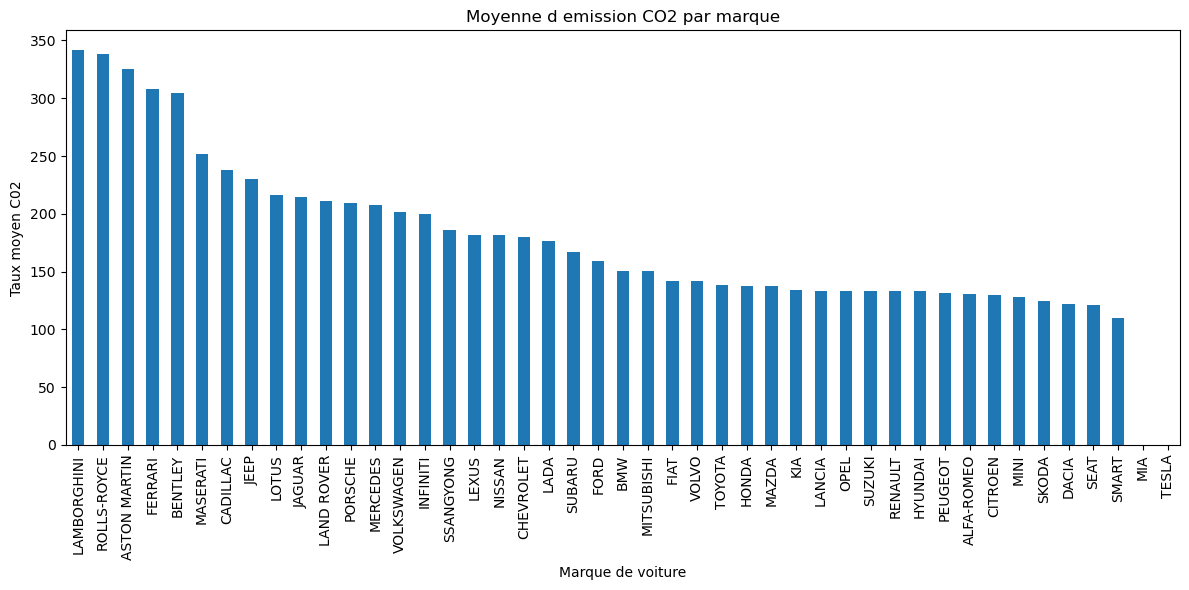

In [19]:
mean_by_modalite = data.groupby('lib_mrq')['co2'].mean()
mean_by_modalite=mean_by_modalite.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
mean_by_modalite.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Moyenne d emission CO2 par marque')
plt.xlabel('Marque de voiture')
plt.ylabel('Taux moyen C02')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


<span style="color:blue"> Emission de C02 en fonction de la gamme  </span>



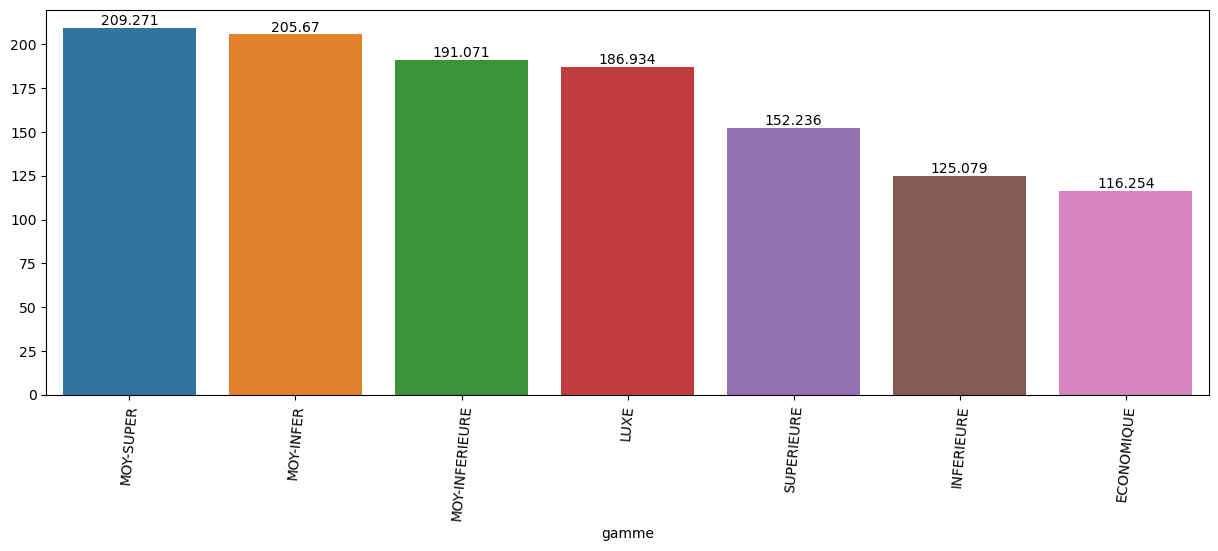

In [20]:
mean_by_marque=data.groupby('gamme')['co2'].mean()
mean_by_marque=mean_by_marque.sort_values(ascending=False)

ax = sns.barplot(y =mean_by_marque.values, x = mean_by_marque.index)
plt.xticks(rotation = 85)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

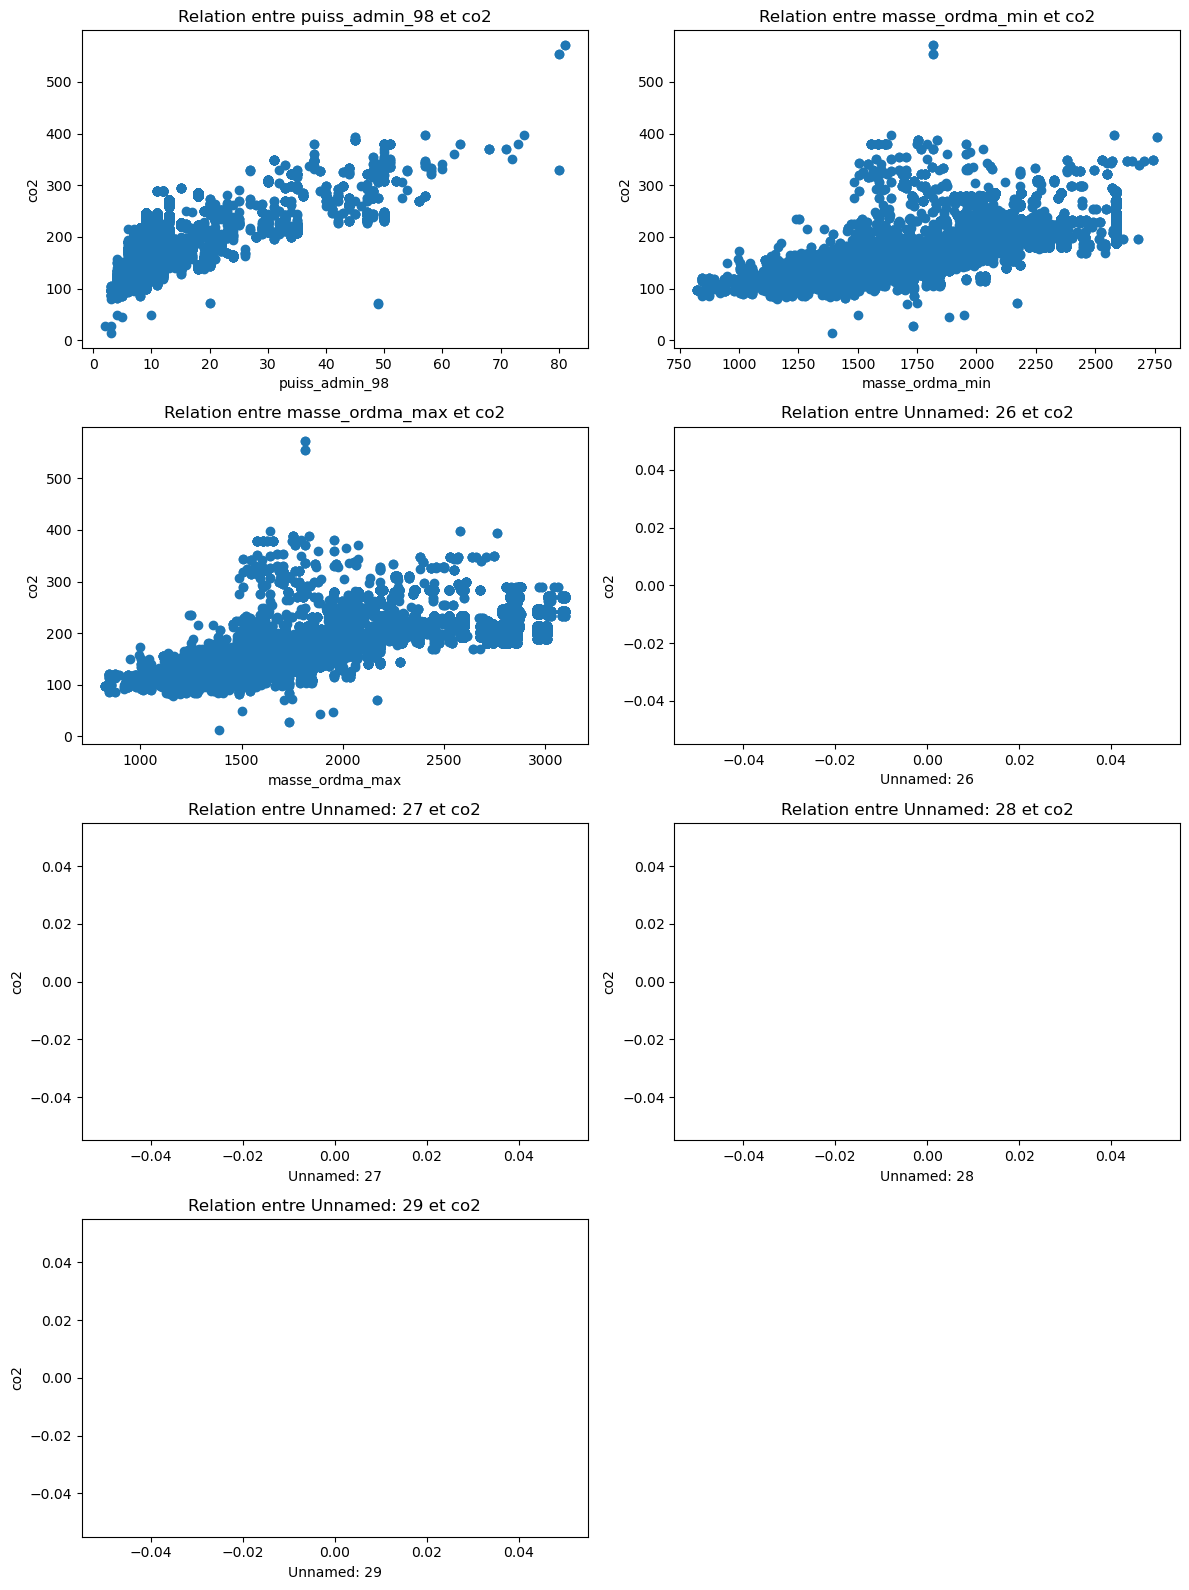

In [21]:
import matplotlib.pyplot as plt
import pandas as pd


y_var = 'co2'
x_vars = df.columns.drop(y_var)

n_rows = len(x_vars) // 2 + len(x_vars) % 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4)) 
axs = axs.flatten()

for i, x_var in enumerate(x_vars):
    axs[i].scatter(df[x_var], df[y_var])
    axs[i].set_title(f'Relation entre {x_var} et {y_var}')
    axs[i].set_xlabel(x_var)
    axs[i].set_ylabel(y_var)

for ax in axs[i+1:]:
    ax.axis('off')

plt.tight_layout()  
plt.show()


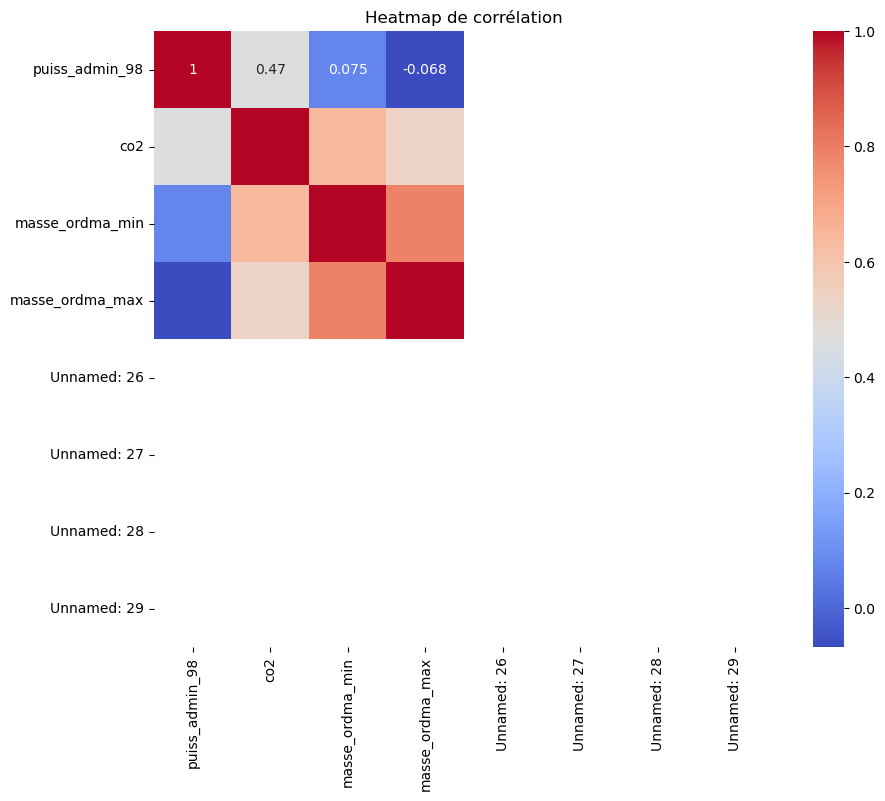

In [22]:

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# heatmap de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heatmap de corrélation')
plt.show()


<span style="color:blue"> Nouvelle matrice de corrélation </span>



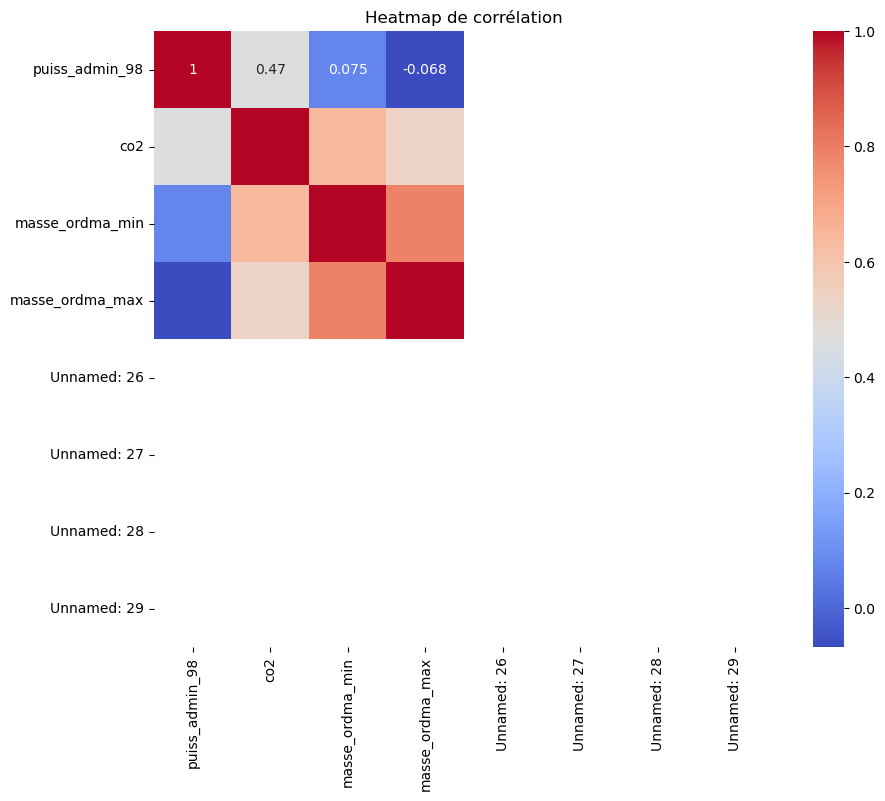

In [39]:
df = df.drop(['conso_urb', 'puiss_max'], axis=1, errors='ignore')

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# heatmap de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heatmap de corrélation')
plt.show()

# Modélisation de l'emission de CO2

<span style="color:blue"> Division des données en données d'entraînement et en données de test.


In [40]:
# Target du modèle
Y = df['co2'].fillna(df['co2'].mean())

#  Features du modèle
X = df.drop('co2', axis=1)

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 20)

<span style="color:blue"> Pipeline de Preprocessing des données : Standardisation et imputation des valeurs manquantes par la médiane </span>



In [41]:

colonnes=X.columns

data_pipeline = Pipeline([('StandardScaler', StandardScaler()), 
                            ('imputer', SimpleImputer(strategy='median')) 
                            ]) 

preprocessor= make_column_transformer((data_pipeline, colonnes))

<span style="color:blue"> Modélisation par la LinearRegression </span>


In [42]:

# Pipeline du modèle de régression linéaire
model = make_pipeline(preprocessor,LinearRegression())  
# Entraînement du modèle 
model.fit(train_X, train_y)
# Prédiction sur les données de test
y_test_pred = model.predict(test_X)

# Calcule de l'erreur quadratique moyenne
rmse_lr = np.sqrt(metrics.mean_squared_error(test_y, y_test_pred))
print(" Root Mean Squared Error:", rmse_lr)
# Calcule du coefficient de détermination R2
r2_lr = r2_score(test_y, y_test_pred)
print("R2 :", r2_lr)


 Root Mean Squared Error: 20.995416629873116
R2 : 0.5975883112150062


<span style="color:blue"> Visualisation de la l'ajustement de la LinearRegression à nos données </span>



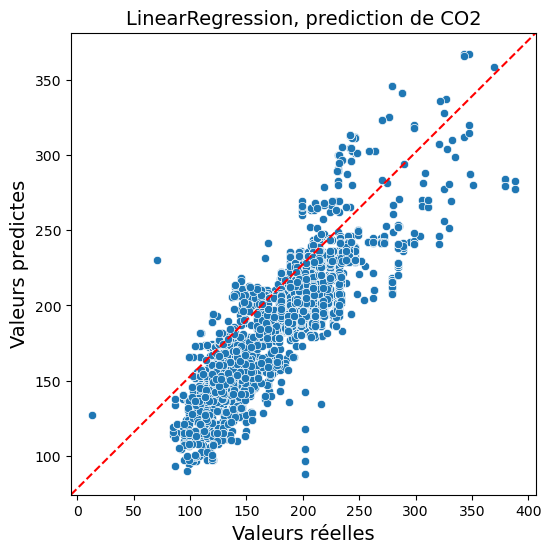

In [43]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = test_y, y = y_test_pred)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("LinearRegression, prediction de CO2", fontsize = 14)
plt.show()